COVID VACCINATION PROGRESS
This data consists of 2 CSV files:
* country_vaccinations.csv
* country_vaccinations_by_manufacturer.csv
The content of each data file can be found on [Kaggle:COVID Vaccination Progress](https://www.kaggle.com/datasets/gpreda/covid-world-vaccination-progress?select=country_vaccinations_by_manufacturer.csv)

In [1]:
library(tidyverse)
library(ggplot2)
library(dplyr)
library(plotly)
library(ggthemes)
library('IRkernel')
library('IRdisplay')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout


The following object is masked from ‘package:httr’:

    config




In [2]:
country_vaccinations <- read_csv("../input/covid-world-vaccination-progress/country_vaccinations.csv")
manufacturers <- read_csv("../input/covid-world-vaccination-progress/country_vaccinations_by_manufacturer.csv")

Rows: 86512 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): country, iso_code, vaccines, source_name, source_website
dbl  (9): total_vaccinations, people_vaccinated, people_fully_vaccinated, da...
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 35623 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): location, vaccine
dbl  (1): total_vaccinations
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
colnames(country_vaccinations)
str(country_vaccinations)

[1] "country"                             "iso_code"                           
 [3] "date"                                "total_vaccinations"                 
 [5] "people_vaccinated"                   "people_fully_vaccinated"            
 [7] "daily_vaccinations_raw"              "daily_vaccinations"                 
 [9] "total_vaccinations_per_hundred"      "people_vaccinated_per_hundred"      
[11] "people_fully_vaccinated_per_hundred" "daily_vaccinations_per_million"     
[13] "vaccines"                            "source_name"                        
[15] "source_website"

spec_tbl_df [86,512 × 15] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ country                            : chr [1:86512] "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ iso_code                           : chr [1:86512] "AFG" "AFG" "AFG" "AFG" ...
 $ date                               : Date[1:86512], format: "2021-02-22" "2021-02-23" ...
 $ total_vaccinations                 : num [1:86512] 0 NA NA NA NA NA 8200 NA NA NA ...
 $ people_vaccinated                  : num [1:86512] 0 NA NA NA NA NA 8200 NA NA NA ...
 $ people_fully_vaccinated            : num [1:86512] NA NA NA NA NA NA NA NA NA NA ...
 $ daily_vaccinations_raw             : num [1:86512] NA NA NA NA NA NA NA NA NA NA ...
 $ daily_vaccinations                 : num [1:86512] NA 1367 1367 1367 1367 ...
 $ total_vaccinations_per_hundred     : num [1:86512] 0 NA NA NA NA NA 0.02 NA NA NA ...
 $ people_vaccinated_per_hundred      : num [1:86512] 0 NA NA NA NA NA 0.02 NA NA NA ...
 $ people_fully_vaccinated_per_h

In [4]:
colnames(manufacturers)
str(manufacturers)

[1] "location"           "date"               "vaccine"           
[4] "total_vaccinations"

spec_tbl_df [35,623 × 4] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ location          : chr [1:35623] "Argentina" "Argentina" "Argentina" "Argentina" ...
 $ date              : Date[1:35623], format: "2020-12-29" "2020-12-29" ...
 $ vaccine           : chr [1:35623] "Moderna" "Oxford/AstraZeneca" "Sinopharm/Beijing" "Sputnik V" ...
 $ total_vaccinations: num [1:35623] 2 3 1 20481 2 ...
 - attr(*, "spec")=
  .. cols(
  ..   location = col_character(),
  ..   date = col_date(format = ""),
  ..   vaccine = col_character(),
  ..   total_vaccinations = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


Extracting Year from Date to create a new column 

In [5]:
country_vaccinations$year <- format(as.Date(country_vaccinations$date, format= "%Y-%m-%d"), "%Y")
manufacturers$year <- format(as.Date(manufacturers$date, format= "%Y-%m-%d"), "%Y")

Creating a new dataframe without null values 

In [6]:
manufacturers <- manufacturers %>%
  filter(across(where(is.character), ~. !="NULL")) %>% 
  type.convert(as.is=TRUE)

Warning message:
“Using `across()` in `filter()` is deprecated, use `if_any()` or `if_all()`.”


In [7]:
manufacturers <- manufacturers %>% 
  select(location, vaccine,total_vaccinations) %>% 
  arrange(desc(total_vaccinations)) %>% 
  distinct(location,vaccine,`.keep_all` = TRUE)

In [8]:
## plotting manufacturers based on the country 
manu_int <- ggplotly(
    ggplot(manufacturers, aes(x=location, y=vaccine)) + 
  geom_bin2d(aes(fill=total_vaccinations)) + 
  scale_fill_gradient(high='#08519C', low='#C6DBEF') +
  labs(title='Types of Vaccines in Each Country', x='Country', y='Vaccine') +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 90,vjust = 0.75, hjust = 1))
)
htmlwidgets::saveWidget(manu_int, "manu_int.html")
display_html('<iframe src="manu_int.html" width=100% height=450></iframe>')

Pfizer/BioNtech, Moderna, Oxford/AstraZeneca, and Johnson&Johnson are the more common manufacturers different countries used between 2020-2021

In [9]:
## creating new dataframe with no null values 
vaccinations_clean <- country_vaccinations %>% 
  filter(across(where(is.numeric), ~. !="NULL")) %>% 
  type.convert(as.is=TRUE)


Warning message:
“Using `across()` in `filter()` is deprecated, use `if_any()` or `if_all()`.”


In [10]:
## percentage of vaccinations by year 
yearly_vaccinations <- vaccinations_clean %>% 
  group_by(year) %>% 
  summarise(total_vaccinations = sum(total_vaccinations)) %>% 
  mutate(percentage = total_vaccinations / sum(total_vaccinations) * 100)

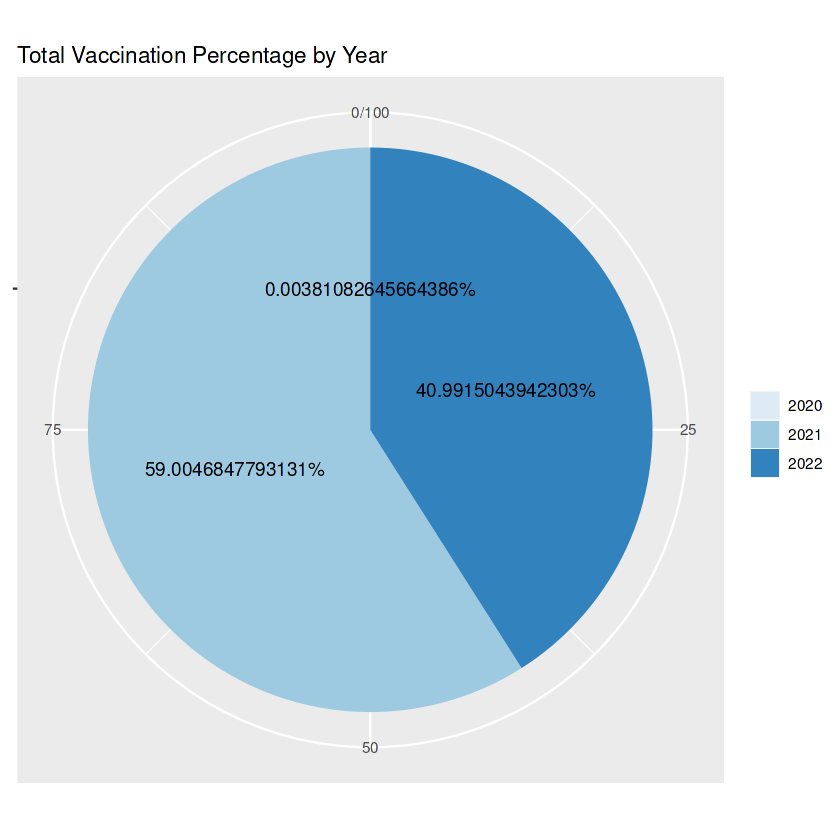

In [11]:
## creating a pie chart to see the percentage of total vaccinations by year 
yearly <- ggplot(yearly_vaccinations, aes(x="", y=percentage,fill=factor(year))) +
  geom_bar(stat="identity", width=1) +
  coord_polar("y", start=0) +
  geom_text(aes(label = paste0(percentage,'%')), position = position_stack(vjust=0.5)) +
  labs(title= 'Total Vaccination Percentage by Year', x = NULL, y = NULL, fill = NULL) +
  scale_fill_brewer(palette="Blues")
print(yearly)

With the pandemic starting in 2020, it makes sense as to why total vaccination percentage in 2020 is so low. Since the virus is new, there are not much studies therefore vaccines were not readily available. 

In [12]:
## who is the top 10 countries with total vaccinations
fully_vac_by_country <- vaccinations_clean %>% 
  select(country,iso_code,total_vaccinations,people_fully_vaccinated) %>% 
  group_by(country) %>% 
  summarise(total_vaccinations=sum(total_vaccinations)) %>% 
  arrange(desc(total_vaccinations))
top_ten <- head(fully_vac_by_country,10)
top_ten

country,total_vaccinations
<chr>,<dbl>
India,320041829965
United States,155013836920
Brazil,76375817173
China,48587024000
Indonesia,42721745182
Germany,38982805956
United Kingdom,36708166771
Turkey,33614723576
France,32177027974


In [13]:
top_ten <- ggplotly(
 ggplot(top_ten, aes(x=country, y=total_vaccinations)) +
  geom_col(fill="#08519C", colour="#08519C") + 
  labs(title='Top 10 Countries with Total Vaccinations', x='Country', y='Total Vaccinations') +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 90,vjust = 0.75, hjust = 1))
    )
htmlwidgets::saveWidget(top_ten, "top_ten.html")
display_html('<iframe src="top_ten.html" width=100% height=450></iframe>')

India, United States and Brazil are leading with total vaccinations between 2020-2022.

In [14]:
#bottom 10 countries with total vaccinations
bottom_ten <- tail(fully_vac_by_country,10)
bottom_ten

country,total_vaccinations
<chr>,<dbl>
Guernsey,144775
Cape Verde,124958
Liberia,67437
Dominica,52331
Sierra Leone,44347
Gabon,33591
Grenada,24336
French Polynesia,16252
Andorra,15269


In [15]:
## graphing bottom 10 countries 
bottom_ten <- ggplotly(
    ggplot(bottom_ten, aes(x=country, y=total_vaccinations)) +
  geom_col(fill="#9ECAE1", colour="#9ECAE1") +
  labs(title='Bottom 10 Countries with Total Vaccinations', x='Country', y='Total Vaccinations') +
  theme_classic() + 
  theme(axis.text.x = element_text(angle = 90,vjust = 0.75, hjust = 1))
    )
htmlwidgets::saveWidget(bottom_ten, "bottom_ten.html")
display_html('<iframe src="bottom_ten.html" width=100% height=450></iframe>')


Countries of French Polynesia, Andorra, and Burundi comes in as bottom 3 for countries with total vaccinations. A lot of variables should be accounted for as to why these countries have such low count for people fully vaccinated (i.e population size, accessebility, proper resources for accurate recording of vaccines, etc) 

In [16]:
## people fully vaccinated 
fully_vac <- vaccinations_clean %>% 
  select(country,iso_code,year,people_fully_vaccinated) %>% 
  group_by(country,year) %>% 
  summarise(fully_vaccinated = sum(people_fully_vaccinated)) %>% 
  arrange(year,desc(fully_vaccinated))

`summarise()` has grouped output by 'country'. You can override using the
`.groups` argument.


In [17]:
vac_2020 <- ggplotly(
    ggplot(filter(fully_vac,year==2020), aes(x=country,y=fully_vaccinated)) +
  geom_col(aes(fill=country)) +
    labs(title='Countries with People Fully Vaccinated in 2020', 
        x=element_blank(),
        y='Vaccination Population') +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 90,vjust = 0.75, hjust = 1))
    )
htmlwidgets::saveWidget(vac_2020, "vac_2020.html")
display_html('<iframe src="vac_2020.html" width=100% height=450></iframe>')

In [18]:
vac_2021 <- ggplotly(
    ggplot(filter(fully_vac,year==2021), aes(x=country,y=fully_vaccinated)) +
  geom_col(aes(fill=country)) +
    labs(title='Countries with People Fully Vaccinated in 2021', 
        x=element_blank(),
        y='Vaccination Population') +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 90,vjust = 0.75, hjust = 1))
    )
htmlwidgets::saveWidget(vac_2021, "vac_2021.html")
display_html('<iframe src="vac_2021.html" width=100% height=450></iframe>')

In [19]:
vac_2022 <- ggplotly(
    ggplot(filter(fully_vac,year==2022), aes(x=country,y=fully_vaccinated)) +
  geom_col(aes(fill=country)) +
    labs(title='Countries with People Fully Vaccinated in 2022', 
        x=element_blank(),
        y='Vaccination Population') +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 90,vjust = 0.75, hjust = 1))
    )
htmlwidgets::saveWidget(vac_2022, "vac_2022.html")
display_html('<iframe src="vac_2022.html" width=100% height=450></iframe>')

The breakdown of people fully vaccinated between 2020-2021 shows the progress of vaccinations across the globe. In 2020, the United States could have been one of the first countries to receive the vaccine hence the large count of people with full vaccinations. 
Again in 2021, the leading countries are India, United States, and Brazil. Considering their population size, it is expected that these countries would have high count for fully vaccinated people. 
In 2022, India, United States are still leading, followed by China and then Brazil. Again, these countries have high population which is why it is expected to have such high counts. 